In [17]:
import pennylane as qml
from pennylane.templates import ApproxTimeEvolution
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [23]:
####
#Trotter-Suzuki <https://en.wikipedia.org/wiki/Lie_product_formula>decomposition formula
#we can implement an approximate time-evolution unitary
#In PennyLane, this is implemented using the :func:"~.pennylane.templates.ApproxTimeEvolution" template
#The Hamiltonian must be explicitly written in terms of products of Pauli gates, (PauliX, PauliY, PauliZ, and Identity).
J=1
B=0.1*J
H = qml.Hamiltonian([-J, -J, -B],[qml.PauliX(0), qml.PauliX(1), qml.PauliX(0) @ qml.PauliX(1)])
print(H)

  (-1) [X0]
+ (-1) [X1]
+ (-0.1) [X0 X1]


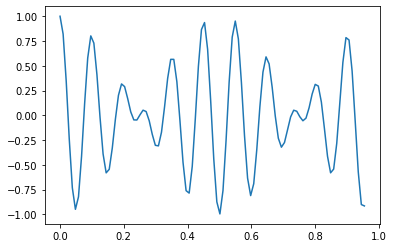

In [30]:
dev = qml.device('default.qubit', wires=2)
n = 40 # The number of Trotter steps used when approximating the time-evolution operator.
@qml.qnode(dev)
def circuit(time):
    qml.templates.ApproxTimeEvolution(H, time, n)
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]
#print(circuit.draw())
points=100
t=30 
times=np.linspace(0,t,points) #The time of evolution, namely the parameter t in e−iHt.
expecMz=np.zeros(points) #calculating Mz
for i in range(0,points):
    expecMz[i]=sum(circuit(times[i]))/2 
natperiod=2*np.pi/(2*B)
plt.figure()
plt.plot(times/natperiod,expecMz)
plt.show()
#print(circuit.draw())